# Изучение характеристик для графа $T^{dist}$

Импортируем необходимые библиотеки и функцию для проведения экспериментов Монте-Карло

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sys
import os


project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, project_root)

from src.utils.utils import monte_carlo_experiment_for_several_characteristics

Фиксируем параметры построения графа

In [3]:
D = 1.5                     # параметр d для dist графа
n_sampels = 100             # число итераций
N = 50                      # размер набора генерируемых данных
lambda_h0 = 1               # lambda для H0
lambda_h1 = 1/np.sqrt(10)   # lambda для H1


### Изучение зависимости характеристик от параметра dist

Для начала посмотрим, как наши данные зависят от параметра dist и подберем его таким образом, чтобы данные разделялись как можно лучше.

In [4]:
dist = np.arange(0.1, 10.1, 0.1) # сгенерировали набор d

metrics_cromatic_number_d_h0 = {}
metrics_clique_number_d_h0 = {}
metrics_size_maximal_independent_set_d_h0 = {}
metrics_size_dom_set_d_h0 = {}

for d in tqdm(dist, desc="Processing"):
    params = {
            'n': N,                # размер генерируемых данных
            'x': d,                # параметр построения графа 
            'lambda': lambda_h0,   # параметр распределения
            'distribution': 'h0'   # тип распределения
         }
    result = monte_carlo_experiment_for_several_characteristics(params, n_sampels)
    metrics_cromatic_number_d_h0[d] = result['cromatic_number']
    metrics_clique_number_d_h0[d] = result['clique_number']
    metrics_size_maximal_independent_set_d_h0[d] = result['size_maximal_independent_set']
    metrics_size_dom_set_d_h0[d] = result['size_dom_set']

Processing: 100%|██████████| 100/100 [00:26<00:00,  3.76it/s]


In [ ]:
metrics_cromatic_number_d_h1 = {}
metrics_clique_number_d_h1 = {}
metrics_size_maximal_independent_set_d_h1 = {}
metrics_size_dom_set_d_h1 = {}

for d in tqdm(dist, desc="Processing"):
    params = {
            'n': N,
            'x': d,
            'lambda': lambda_h1,
            'distribution': 'h1'
         }
    result = monte_carlo_experiment_for_several_characteristics(params, n_sampels)
    metrics_cromatic_number_d_h1[d] = result['cromatic_number']
    metrics_clique_number_d_h1[d] = result['clique_number']
    metrics_size_maximal_independent_set_d_h1[d] = result['size_maximal_independent_set']
    metrics_size_dom_set_d_h1[d] = result['size_dom_set']

Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Processing: 100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


Построим графики

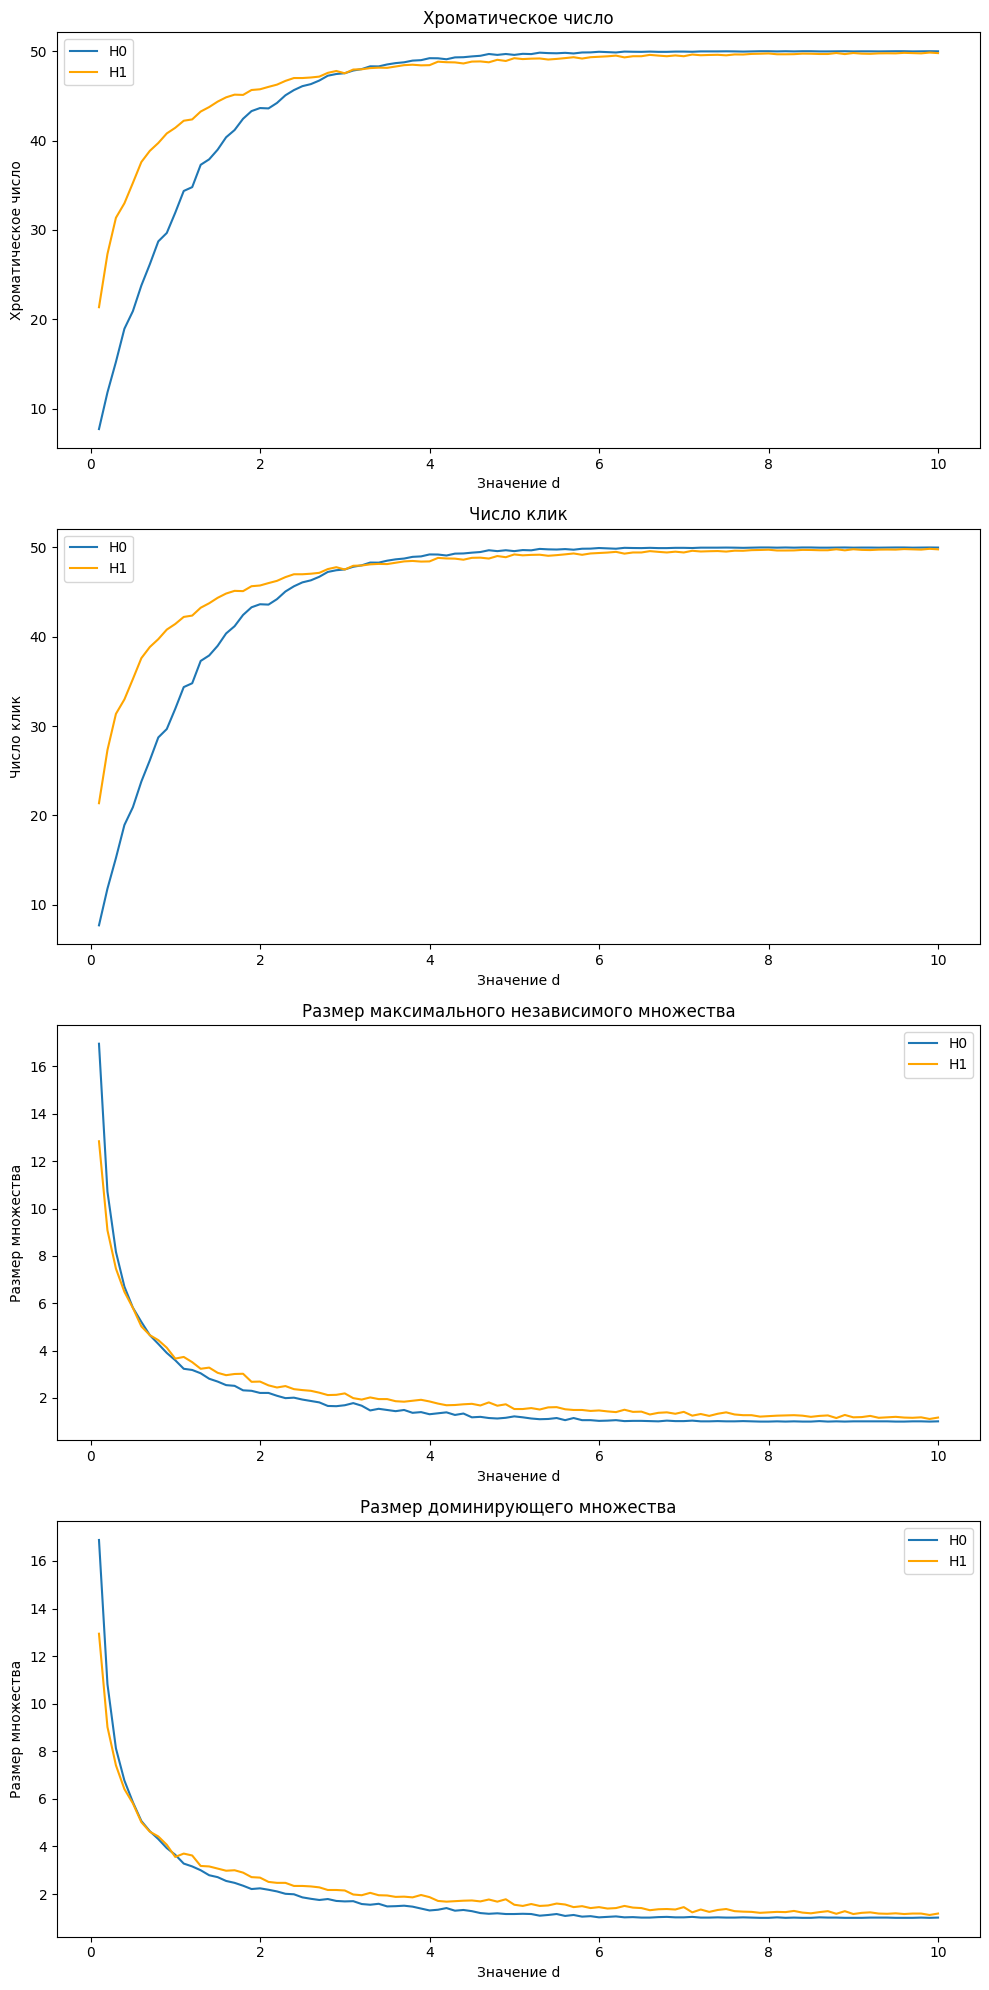

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# График для хроматического числа
axs[0].plot(metrics_cromatic_number_d_h0.keys(), metrics_cromatic_number_d_h0.values(), label='H0')
axs[0].plot(metrics_cromatic_number_d_h1.keys(), metrics_cromatic_number_d_h1.values(), color='orange', label='H1')
axs[0].set_title('Хроматическое число')
axs[0].set_xlabel('Значение d')
axs[0].set_ylabel('Хроматическое число')
axs[0].legend()

# График для числа кликов
axs[1].plot(metrics_clique_number_d_h0.keys(), metrics_clique_number_d_h0.values(), label='H0')
axs[1].plot(metrics_clique_number_d_h1.keys(), metrics_clique_number_d_h1.values(), color='orange', label='H1')
axs[1].set_title('Число клик')
axs[1].set_xlabel('Значение d')
axs[1].set_ylabel('Число клик')
axs[1].legend()

# График для размера максимального независимого множества
axs[2].plot(metrics_size_maximal_independent_set_d_h0.keys(), metrics_size_maximal_independent_set_d_h0.values(), label='H0')
axs[2].plot(metrics_size_maximal_independent_set_d_h1.keys(), metrics_size_maximal_independent_set_d_h1.values(), color='orange', label='H1')
axs[2].set_title('Размер максимального независимого множества')
axs[2].set_xlabel('Значение d')
axs[2].set_ylabel('Размер множества')
axs[2].legend()

# График для размера доминирующего множества
axs[3].plot(metrics_size_dom_set_d_h0.keys(), metrics_size_dom_set_d_h0.values(), label='H0')
axs[3].plot(metrics_size_dom_set_d_h1.keys(), metrics_size_dom_set_d_h1.values(), color='orange', label='H1')
axs[3].set_title('Размер доминирующего множества')
axs[3].set_xlabel('Значение d')
axs[3].set_ylabel('Размер множества')
axs[3].legend()

# Автоматическая настройка макета
plt.tight_layout()
plt.show()

Хроматическое число и число клик лучще всего разделяются при небольших d в диапазоне от 0 до 2.
Размер максимального независимого множества и размер доминирующего множества лучше всего разделяются при d от 1 до 4.

Поэтому в дальнейших экспериментах будем брать d = 1.5

### Изучение характеристик в зависимости от размера выборки

Теперь посмотрим, как зависят наши характеристики от n.

In [ ]:
data_size = np.arange(1, 500, 50)  # сгенерировали набор n

metrics_cromatic_number_n_h0 = {}
metrics_clique_number_n_h0 = {}
metrics_size_maximal_independent_set_n_h0 = {}
metrics_size_dom_set_n_h0 = {}

for n in tqdm(data_size, desc="Processing"):
    params = {
            'n': n,
            'x': D,
            'lambda': lambda_h0,
            'distribution': 'h0'
         }
    result = monte_carlo_experiment_for_several_characteristics(params, n_sampels)
    metrics_cromatic_number_n_h0[n] = result['cromatic_number']
    metrics_clique_number_n_h0[n] = result['clique_number']
    metrics_size_maximal_independent_set_n_h0[n] = result['size_maximal_independent_set']
    metrics_size_dom_set_n_h0[n] = result['size_dom_set']

Processing:   0%|          | 0/10 [00:00<?, ?it/s]

Processing: 100%|██████████| 10/10 [04:21<00:00, 26.17s/it]


In [ ]:
metrics_cromatic_number_n_h1 = {}
metrics_clique_number_n_h1 = {}
metrics_size_maximal_independent_set_n_h1 = {}
metrics_size_dom_set_n_h1 = {}

for n in tqdm(data_size, desc="Processing"):
    params = {
            'n': n,
            'x': D,
            'lambda': lambda_h1,
            'distribution': 'h1'
         }
    result = monte_carlo_experiment_for_several_characteristics(params, n_sampels)
    metrics_cromatic_number_n_h1[n] = result['cromatic_number']
    metrics_clique_number_n_h1[n] = result['clique_number']
    metrics_size_maximal_independent_set_n_h1[n] = result['size_maximal_independent_set']
    metrics_size_dom_set_n_h1[n] = result['size_dom_set']

Processing: 100%|██████████| 10/10 [03:14<00:00, 19.44s/it]


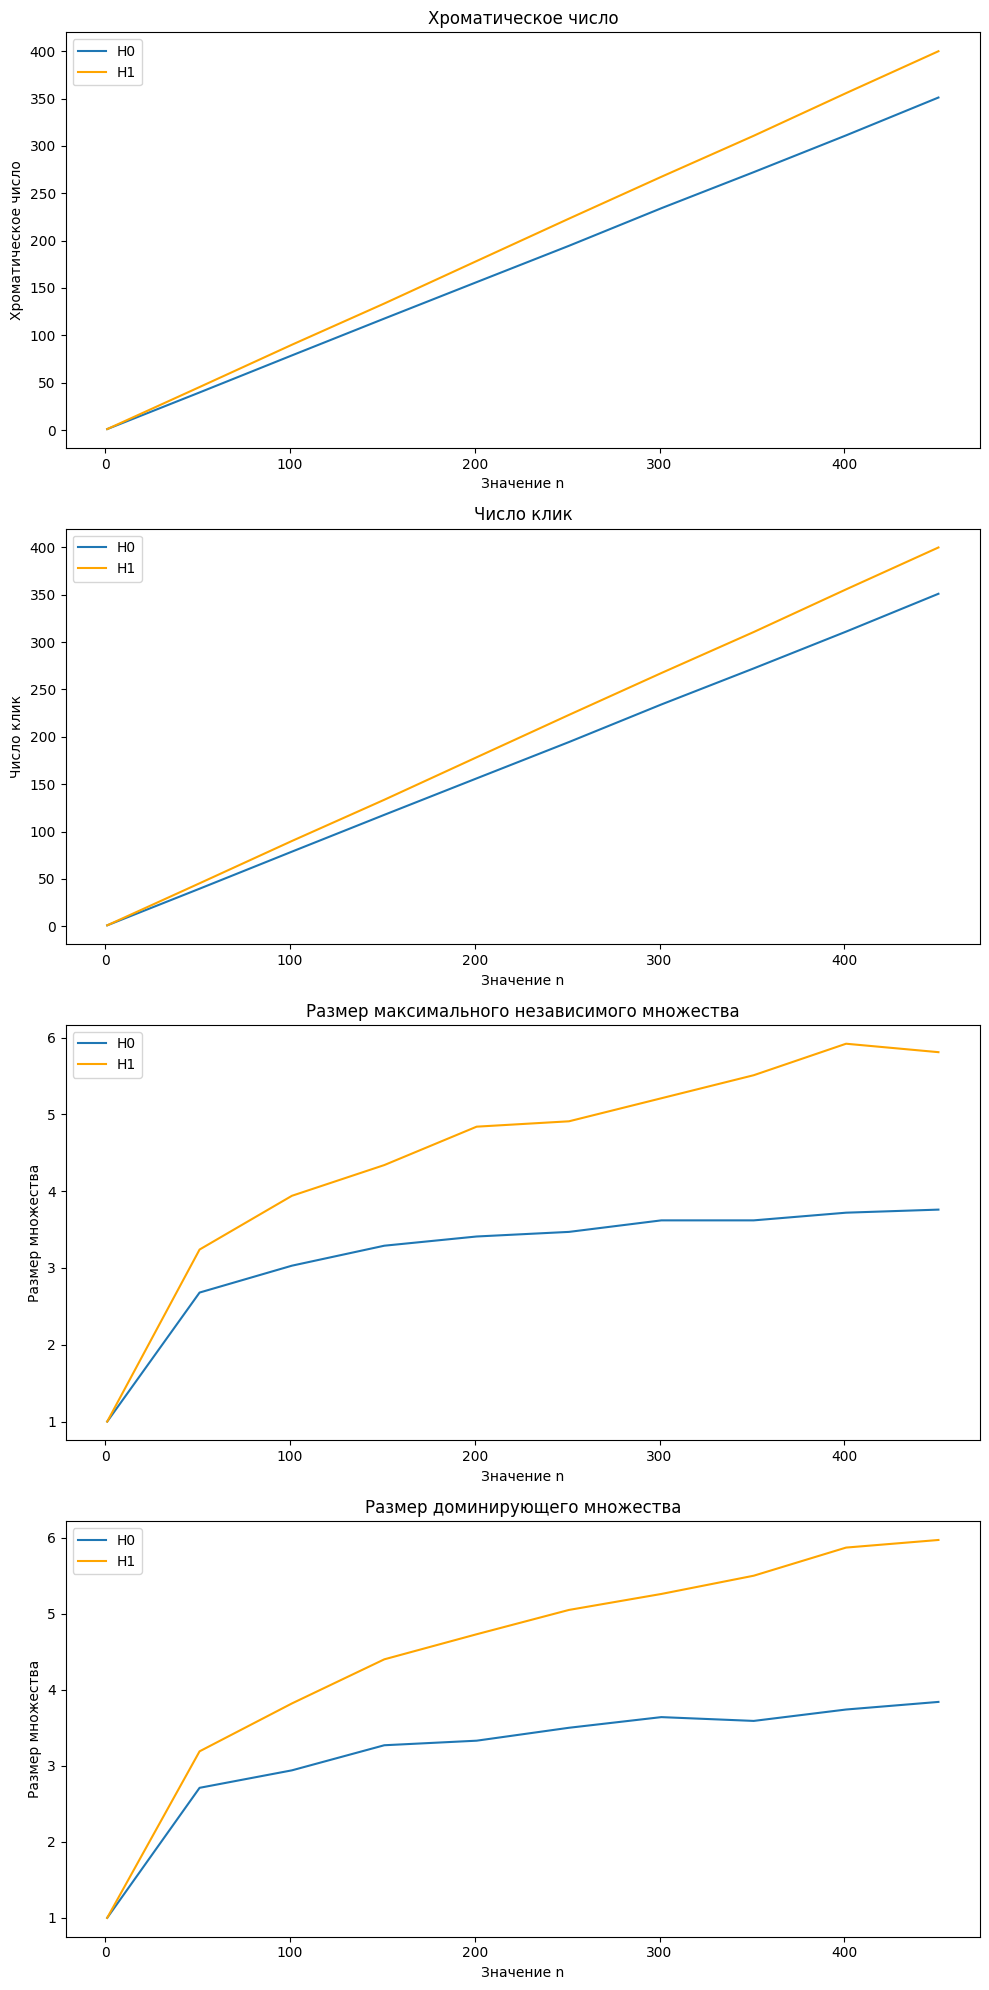

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# График для хроматического числа
axs[0].plot(metrics_cromatic_number_n_h0.keys(), metrics_cromatic_number_n_h0.values(), label='H0')
axs[0].plot(metrics_cromatic_number_n_h1.keys(), metrics_cromatic_number_n_h1.values(), color='orange', label='H1')
axs[0].set_title('Хроматическое число')
axs[0].set_xlabel('Значение n')
axs[0].set_ylabel('Хроматическое число')
axs[0].legend()

# График для числа кликов
axs[1].plot(metrics_clique_number_n_h0.keys(), metrics_clique_number_n_h0.values(), label='H0')
axs[1].plot(metrics_clique_number_n_h1.keys(), metrics_clique_number_n_h1.values(), color='orange', label='H1')
axs[1].set_title('Число клик')
axs[1].set_xlabel('Значение n')
axs[1].set_ylabel('Число клик')
axs[1].legend()

# График для размера максимального независимого множества
axs[2].plot(metrics_size_maximal_independent_set_n_h0.keys(), metrics_size_maximal_independent_set_n_h0.values(), label='H0')
axs[2].plot(metrics_size_maximal_independent_set_n_h1.keys(), metrics_size_maximal_independent_set_n_h1.values(), color='orange', label='H1')
axs[2].set_title('Размер максимального независимого множества')
axs[2].set_xlabel('Значение n')
axs[2].set_ylabel('Размер множества')
axs[2].legend()

# График для размера доминирующего множества
axs[3].plot(metrics_size_dom_set_n_h0.keys(), metrics_size_dom_set_n_h0.values(), label='H0')
axs[3].plot(metrics_size_dom_set_n_h1.keys(), metrics_size_dom_set_n_h1.values(), color='orange', label='H1')
axs[3].set_title('Размер доминирующего множества')
axs[3].set_xlabel('Значение n')
axs[3].set_ylabel('Размер множества')
axs[3].legend()

# Автоматическая настройка макета
plt.tight_layout()
plt.show()

Как мы видим, все характеристики растут при увеличении n, при этом при фиксированном n для H1 каждая характеристика всегда больше, чем для H0

Давайте теперь сгенерируем наборы данных для H0 и H1 и размеров выборок 25, 100 и 500 чтобы посмотреть, как хорошо разделяются наши характеристики

In [ ]:
data_size = [25, 100, 500]

cromatic_number_h0 = {}
clique_number_h0 = {}
size_maximal_independent_set_h0 = {}
size_dom_set_h0 = {}

cromatic_number_h1 = {}
clique_number_h1 = {}
size_maximal_independent_set_h1 = {}
size_dom_set_h1 = {}

for n in tqdm(data_size, desc="Processing"):
    params_h0 = {
        'n': n,
        'x': D,
        'lambda': lambda_h0,
        'distribution': 'h0'
        }
    
    params_h1 = {
        'n': n,
        'x': D,
        'lambda': lambda_h1,
        'distribution': 'h1'
        }
    
    result_h0 = monte_carlo_experiment_for_several_characteristics(params_h0, n_sampels, False)
    result_h1 = monte_carlo_experiment_for_several_characteristics(params_h1, n_sampels, False)

    cromatic_number_h0[n] = result_h0['metrics_cromatic_number']
    clique_number_h0[n] = result_h0['metrics_clique_number']
    size_maximal_independent_set_h0[n] = result_h0['metrics_size_maximal_independent_set']
    size_dom_set_h0[n] = result_h0['metrics_size_dom_set']

    cromatic_number_h1[n] = result_h1['metrics_cromatic_number']
    clique_number_h1[n] = result_h1['metrics_clique_number']
    size_maximal_independent_set_h1[n] = result_h1['metrics_size_maximal_independent_set']
    size_dom_set_h1[n] = result_h1['metrics_size_dom_set']
    

Processing: 100%|██████████| 3/3 [03:56<00:00, 78.84s/it] 


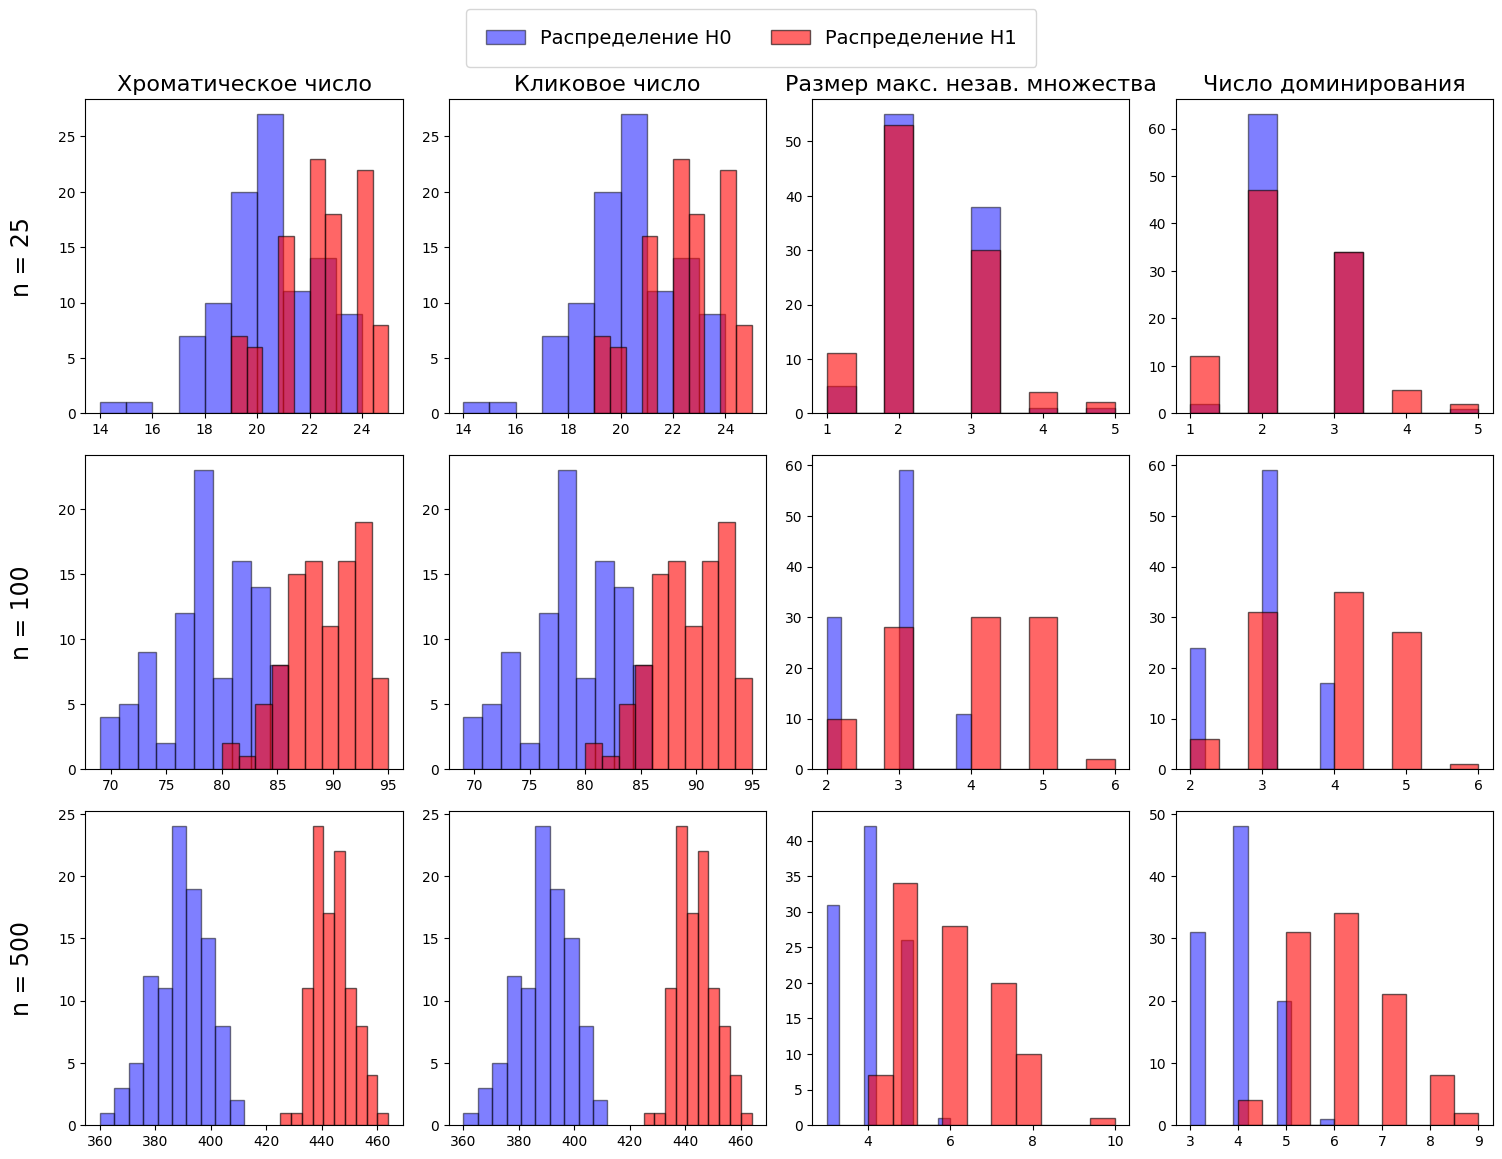

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))

i=0

for n in data_size:
    axes[i][0].text(-0.2, 0.5, f'n = {n}', fontsize=17, va='center', ha='center', rotation=90, transform=axes[i][0].transAxes)
    axes[i][0].hist(cromatic_number_h0[n], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Метрики H0')
    axes[i][0].hist(cromatic_number_h1[n], bins=10, alpha=0.6, color='red', edgecolor='black', label='Метрики H1')
    axes[i][1].hist(clique_number_h0[n], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Метрики H0')
    axes[i][1].hist(clique_number_h1[n], bins=10, alpha=0.6, color='red', edgecolor='black', label='Метрики H1')
    axes[i][2].hist(size_maximal_independent_set_h0[n], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Метрики H0')
    axes[i][2].hist(size_maximal_independent_set_h1[n], bins=10, alpha=0.6, color='red', edgecolor='black', label='Метрики H1')
    axes[i][3].hist(size_dom_set_h0[n], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Метрики H0')
    axes[i][3].hist(size_dom_set_h1[n], bins=10, alpha=0.6, color='red', edgecolor='black', label='Метрики H1')
    i+=1

fig.legend(['Распределение H0', 'Распределение H1'], loc='upper center', ncol=2, fontsize=14, borderpad=1)
axes[0][0].set_title("Хроматическое число", fontsize=16)
axes[0][1].set_title("Кликовое число", fontsize=16)
axes[0][2].set_title("Размер макс. незав. множества", fontsize=16)
axes[0][3].set_title("Число доминирования", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Выравнивание подграфиков
plt.show()

Как мы видим, при всех размерах выборки характеристики для H0 и H1 хорошо разделяются, значит, они могут быть использованы как признаки классификации.

### Изучение корреляции характеристик

Построим набор данных для каждого распределения и посмотрим на корреляцию между признаками: 

In [ ]:
cromatic_number_h0 = {}
clique_number_h0 = {}
size_maximal_independent_set_h0 = {}
size_dom_set_h0 = {}

cromatic_number_h1 = {}
clique_number_h1 = {}
size_maximal_independent_set_h1 = {}
size_dom_set_h1 = {}

n_sampels = 2000
d = 1.5


params_h0 = {
        'n': N,
        'x': d,
        'lambda': lambda_h0,
        'distribution': 'h0'
        }


params_h1 = {
        'n': N,
        'x': d,
        'lambda': lambda_h1,
        'distribution': 'h1'
        }


result_h0 = monte_carlo_experiment_for_several_characteristics(params_h0, n_sampels, False)
result_h1 = monte_carlo_experiment_for_several_characteristics(params_h1, n_sampels, False)

cromatic_number_h0 = result_h0['metrics_cromatic_number']
clique_number_h0 = result_h0['metrics_clique_number']
size_maximal_independent_set_h0 = result_h0['metrics_size_maximal_independent_set']
size_dom_set_h0 = result_h0['metrics_size_dom_set']


cromatic_number_h1 = result_h1['metrics_cromatic_number']
clique_number_h1 = result_h1['metrics_clique_number']
size_maximal_independent_set_h1 = result_h1['metrics_size_maximal_independent_set']
size_dom_set_h1 = result_h1['metrics_size_dom_set']

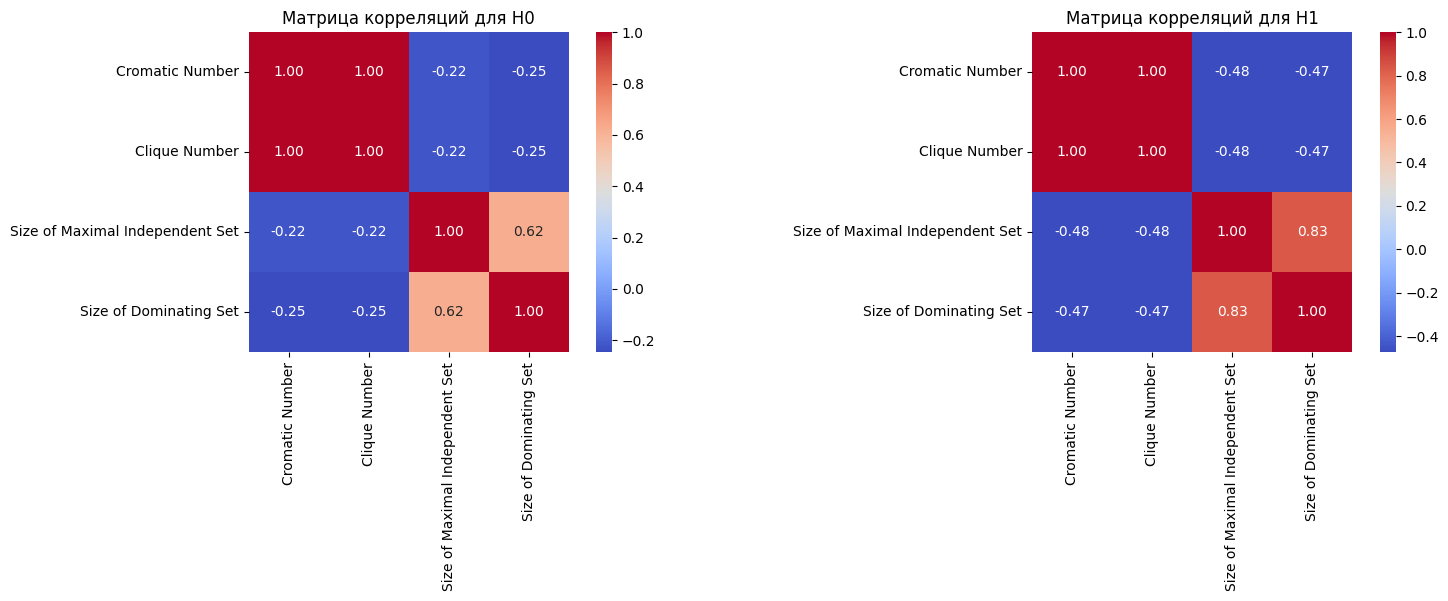

In [ ]:
import pandas as pd

data_h0 = {
    'Cromatic Number': cromatic_number_h0,
    'Clique Number': clique_number_h0,
    'Size of Maximal Independent Set': size_maximal_independent_set_h0,
    'Size of Dominating Set': size_dom_set_h0
}

df_h0 = pd.DataFrame(data_h0)
correlation_matrix_h0 = df_h0.corr()

data_h1 = {
    'Cromatic Number': cromatic_number_h1,
    'Clique Number': clique_number_h1,
    'Size of Maximal Independent Set': size_maximal_independent_set_h1,
    'Size of Dominating Set': size_dom_set_h1
}

df_h1 = pd.DataFrame(data_h1)
correlation_matrix_h1 = df_h1.corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix_h0, annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=axes[0])
axes[0].set_title('Матрица корреляций для H0')

sns.heatmap(correlation_matrix_h1, annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=axes[1])
axes[1].set_title('Матрица корреляций для H1')

plt.tight_layout()
plt.show()

У хроматического числа и кликового числа корреляция равна 1, у размера макс. независимого множества и числа доминирования корреляция большая при обоих распределениях.

В дальнейших экспериментах и при построении классификаторов будем исользовать только хроматические число и размер макс. независимого множества.

## Выводы

1) Для хорошего разделения данных можно использовать параметр dist=1.5

2) Все характеристики можно использовать, как признак классификации, так как для всех размеров подвыборки характеристики хорошо разделяются.

3) Для классификации можно использовать не все признаки, так как некоторые из них имеют сильную корреляцию.